In [13]:
import pandas as pd

books_df = pd.read_csv('../data/cleaned/Amazon_Books_Cleaned.csv', index_col=0)
books_df


,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,Number_people_rated,URLs,Rating category
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...,Good
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...,Good
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...,Good
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...,Good
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...,Good
...,...,...,...,...,...,...,...,...,...,...
7923,Insight Guides Poland (Travel Guide with Free ...,Insight Travel Guide,Travel,Travel & Holiday Guides,Paperback,1326.00,4.7,16.0,https://www.amazon.in/Insight-Guides-Poland-Tr...,Good
7924,Lonely Planet India 19 (Travel Guide),Anirban Mahapatra,Travel,Travel & Holiday Guides,Paperback,850.00,4.4,187.0,https://www.amazon.in/Lonely-Planet-India-Trav...,Good
7925,Eyewitness Travel Phrase Book French (EW Trave...,DK,Travel,Travel & Holiday Guides,Paperback,307.00,4.5,168.0,https://www.amazon.in/Eyewitness-Travel-Phrase...,Good
7926,Lonely Planet Australia (Travel Guide),Andrew Bain,Travel,Travel & Holiday Guides,Kindle Edition,1814.50,4.7,267.0,https://www.amazon.in/Lonely-Planet-Australia-...,Good


# Best rating books by genre and number of people that rate them

In [35]:
genre_ranking = books_df.groupby('Main Genre')

genre_ranking = genre_ranking.apply( # We create a df with a rating average by the genre and No of people rated
    lambda df: (df['Rating'] * df['Number_people_rated']).sum() / df['Number_people_rated'].sum()
).reset_index(name='Rating') 
genre_ranking = genre_ranking.sort_values(by='Rating', ascending=False)
genre_ranking.reset_index(drop=True)

C:\Users\asmal\AppData\Local\Temp\ipykernel_13840\3883170937.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_ranking = genre_ranking.apply( # We create a df with a rating average by the genre and No of people rated


,Main Genre,Rating
0,Comics & Mangas,4.633550
1,"Fantasy, Horror & Science Fiction",4.632502
2,Politics,4.628138
3,Children's Books,4.619549
4,Religion,4.586317
5,Society & Social Sciences,4.579914
6,"Sciences, Technology & Medicine",4.578035
7,"Language, Linguistics & Writing",4.570588
8,Travel,4.546880
9,"Biographies, Diaries & True Accounts",4.528763


# Get main genre graphs

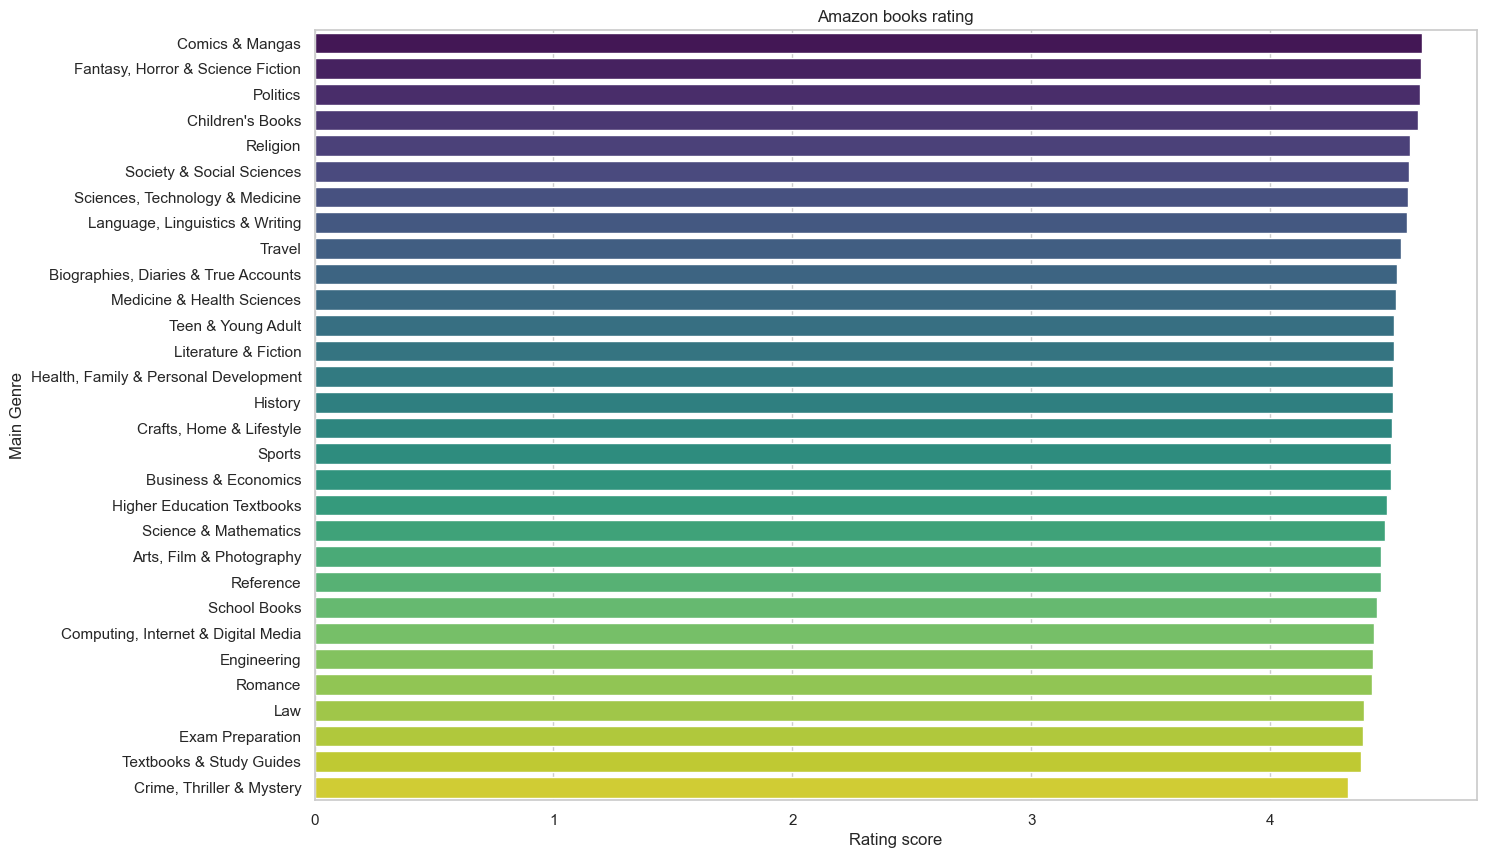

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

plt.figure(figsize=(15, 10))
sns.barplot(x='Rating', y='Main Genre', data=genre_ranking, palette='viridis', hue='Main Genre')

plt.xlabel('Rating score')
plt.ylabel('Main Genre')
plt.title('Amazon books rating')
plt.show()